# **Fusion360**

To get this software make a **personal use** subscription on the website [www.autodesk.com](https://www.autodesk.com/products/fusion-360/overview?term=1-YEAR&tab=subscription)

The best tutorial course on Fusion360 for beginners can be found [here](https://www.youtube.com/playlist?list=PLrZ2zKOtC_-C4rWfapgngoe9o2-ng8ZBr)

## **First model**
Robotic arm 4dof
Make an 3d model for robotics arm with following morfology: shoulder pitch -> shoulder roll -> shoulder yaw -> elbow pitch -> forearm > end-effector.
The sizes and masses for motors bring from data sheet on motor [MF4005v2(RMD-L-4005)BLDC](https://aliexpress.ru/item/1005003261130247.html?spm=a2g2w.orderdetail.0.0.27814aa6f24V4l&sku_id=12000031590377027). Link lengths 100 mm, link mass 20 g

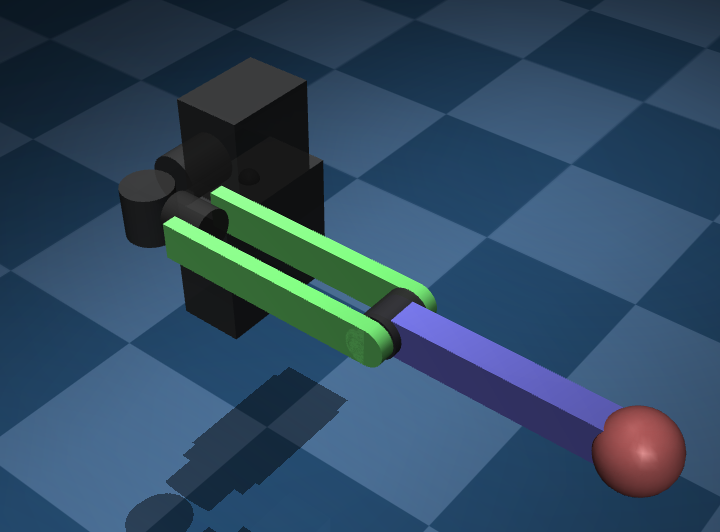

# **URDF**
URDF, Unified Robot Description Format is an XML format for representing a robot model. URDF is commonly used in Robot Operating System (ROS) tools such as rviz (Ros Visualization tool) and Gazebo simulator. The model consists of [links](https://wiki.ros.org/urdf/XML/link) and [joints](https://wiki.ros.org/urdf/XML/joint) motion.

**URDF model supports only serial robots**
![](https://wiki.ros.org/urdf/XML/joint?action=AttachFile&do=get&target=joint.png)

![](https://wiki.ros.org/urdf/XML/link?action=AttachFile&do=get&target=inertial.png)

# **From 3d model to URDF conversion**
To make this conversion use [Fusion2Pybullet Add-in](https://github.com/yanshil/Fusion2PyBullet)
To install Fusion2Pybullet:
1. Copy the github repository on your computer
2. Run the following command in your shell.

**Windows (In PowerShell)**
```
cd <path to Fusion2PyBullet>
Copy-Item ".\Bullet_URDF_Exporter\" -Destination "${env:APPDATA}\Autodesk\Autodesk Fusion 360\API\Scripts\" -Recurse
```


**macOS (In bash or zsh)**
```
cd <path to Fusion2PyBullet>
cp -r ./Bullet_URDF_Exporter "$HOME/Library/Application Support/Autodesk/Autodesk Fusion 360/API/Scripts/"
```

## **How to convert 3d model to urdf**
See the [tutorial](https://www.youtube.com/watch?v=_ZFo6wPXjeQ). Note: this tutorial for [fusion2urdf](https://github.com/syuntoku14/fusion2urdf), but the steps the same as in [Fusion2Pybullet](https://github.com/yanshil/Fusion2PyBullet)

## **How to run urdf model in mujoco**
1. Remove all materials from links
2. Add in urdf following code after `<robot name="robot_name">`:
```xml
  <mujoco>
    <compiler balanceinertia="true" discardvisual="false" meshdir="meshes" fusestatic="false"/>
  </mujoco>
```
`balanceinertia="true"` - helps mujoco to make the inertia balance calculated in the model

`discardvisual="false"` - makes mujoco also take bodies from the `visual` attribute this is useful if you describe `collison` through primitives (culinders, boxes and spheres)

`meshdir="meshes"` - path to foulder with meshes (.stl files) of your model

`fusestatic="false"` - this attribute controls a compiler optimization feature where static bodies are fused with their parent, and any elements defined in those bodies are reassigned to the parent.

Now you can visualize your model in mujoco, by the following command:
```
python -m mujoco.viewer --mjcf=**filename**.urdf
```

To save .xml-file click on `Save xml` in mujoco viewer

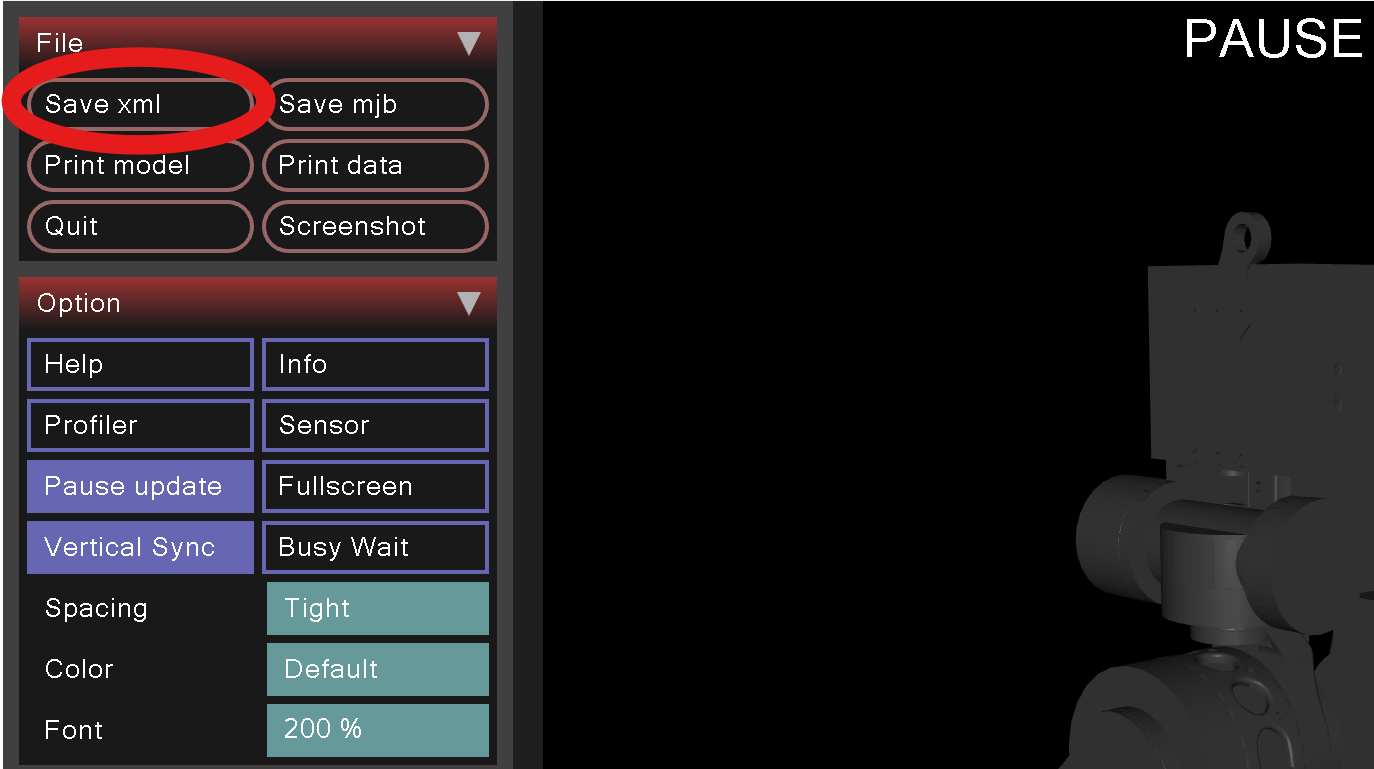

Now you can fix .xml code, add `equality` constrains to make robot parallel

# **Tasks**
> *   Make a calibration model for the 3d printer. It should be a plate with 5 holes of sizes 4.5 mm, 4.75 mm, 5 mm, 5.25 mm and 5.5 mm. The height of the plate should be 10 mm. And there should also be a cylinder of 5mm diameter (separate from the plate).
Put some identifying mark on the plate so that you can distinguish the holes from each other.
Upload a screenshot of the resulting calibration model to github.
> *   Make a 3d model and do conversion to urdf and xml of [parallel spherical manipulator](https://www.youtube.com/watch?v=7kbgI9xBBX4).
Thickness of links choose by yourself, arcs should be 90 degrees with radius of 10 cm.
> In github, attach a screenshot of your 3d model, .urdf and .xml files of the model. Important: xml model of the robot must be a closed loop (with equality constraints)



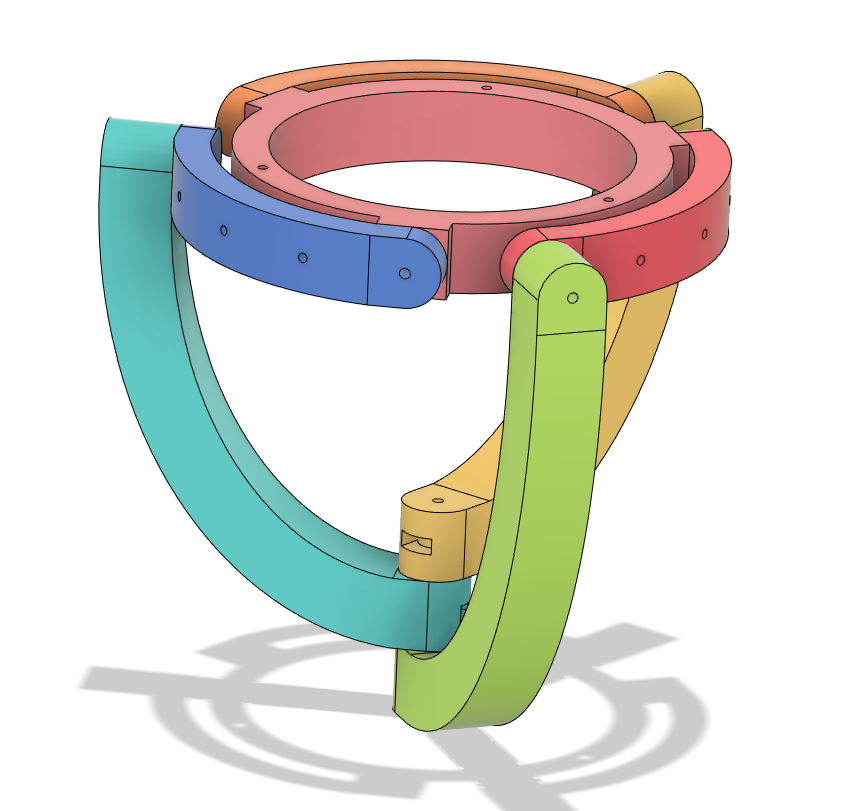